In [35]:
import pandas as pd
import numpy as np

from IPython.core.display import Image, display

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

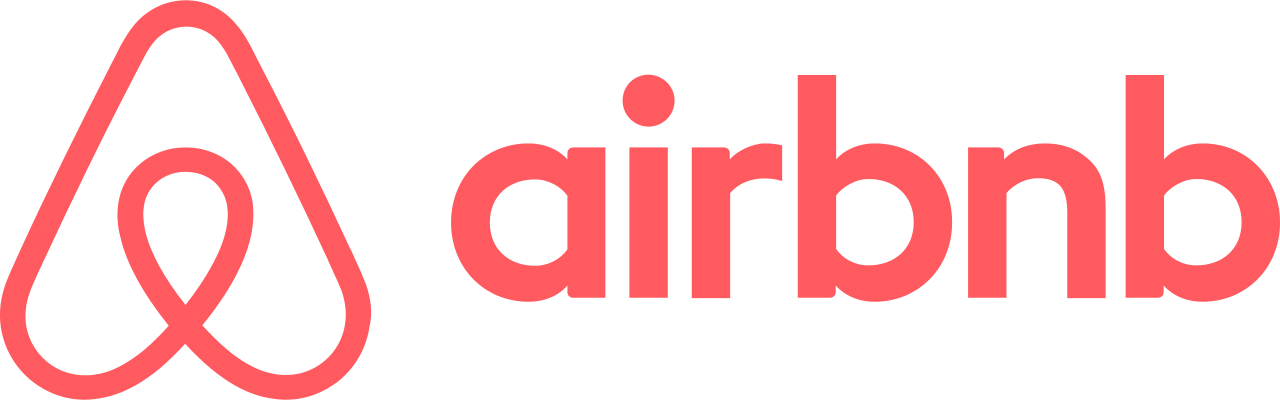

In [36]:
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/1280px-Airbnb_Logo_B%C3%A9lo.svg.png',
              width=350, unconfined=True))

# Airbnb Listings (Data Exploration)

#### Table of contents
* [Data Exploration](#Data-Exploration)
    * [Accommodation](#Accommodation)
    * [Reviews](#Reviews)
    * [Price and Zipcodes](#Price-and-Zipcodes)
    * [Price and Reviews](#Price-and-Reviews)

#### Loading the preprocessed Data

In [37]:
Data = pd.read_csv('Data/Clean_Airbnb_Listings.csv')
Lists_df = pd.read_csv('Data/Airbnb_Listings_Extra.csv')
Data.head().style.hide_index()

id,review_scores_rating,availability_30,host_id,review_scores_accuracy,availability_365,review_scores_value,minimum_nights,price,accommodates,maximum_nights,review_scores_location,availability_90,number_of_reviews,availability_60,review_scores_checkin,monthly_price,beds,host_since,bathrooms,bedrooms,review_scores_cleanliness,review_scores_communication,zipcode,weekly_price,Apartment,Bed & Breakfast,Boat,Cabin,Camper/RV,Castle,Cave,Chalet,Dorm,Earth House,House,Hut,Lighthouse,Loft,Other,Tent,Treehouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
1069266,86,21,5867023,9,322,9,3,160,2,14,10,72,62,51,9,3054.32,1,4/10/13,1,1,7,9,10022,1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2061725,98,4,4601412,10,227,10,3,58,2,30,9,26,35,13,10,3054.32,2,1/5/13,1,1,10,10,11221,953.795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
44974,96,1,198425,10,274,9,10,185,2,30,10,1,26,1,10,3400,1,8/11/10,1,1,9,10,10011,953.795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4701675,100,30,22590025,10,365,10,1,195,2,1125,10,90,1,60,10,3054.32,2,10/15/14,1,1,10,10,10011,953.795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
68914,96,11,343302,10,287,9,2,165,6,365,10,57,16,33,10,3054.32,3,1/11/11,1,2,9,9,11231,953.795,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Extracting the lists

In [38]:
Properties_List=list(Lists_df.Properties_List[Lists_df.Properties_List!='0'])
Rooms_List=list(Lists_df.Rooms_List[Lists_df.Rooms_List!='0'])
Beds_List=list(Lists_df.Beds_List[Lists_df.Beds_List!='0'])
del Lists_df

## Data Exploration

### Accommodation

In [39]:
Beds = Data.groupby('beds')['id'].aggregate({'count': 'count'})
Beds.T

beds,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
count,16405,5589,1786,618,245,120,41,22,3,20,4,9,1,15,27


In [40]:
Accommodates = Data.groupby('accommodates')['id'].aggregate({'count': 'count'})
Accommodates.T

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,2757,11696,2957,4382,994,1231,219,335,58,123,15,44,5,14,5,70


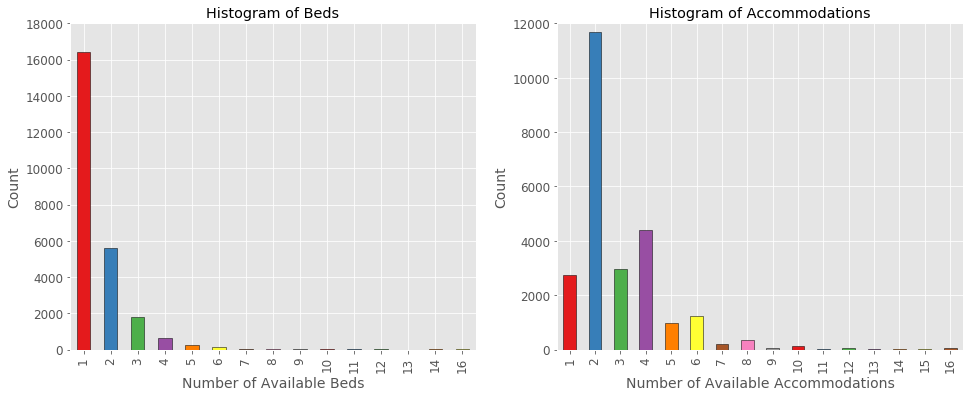

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)

# Left Plot
_ = Beds.reset_index().plot.bar(x='beds', y='count', rot=90, legend=False, ax=ax[0],
                                color=sns.color_palette("Set1"), edgecolor="k")
_ = ax[0].set_title('Histogram of Beds')
_ = ax[0].set_ylim([0, 18e3])
_ = ax[0].set_xlabel('Number of Available Beds')
_ = ax[0].set_ylabel('Count')

# Right Plot
_ = Accommodates.reset_index().plot.bar(x='accommodates', y='count', rot=90, legend=False, ax=ax[1],
                                        color=sns.color_palette("Set1"), edgecolor="k")
_ = ax[1].set_title('Histogram of Accommodations')
_ = ax[1].set_ylim([0, 1.2e4])
_ = ax[1].set_xlabel('Number of Available Accommodations')
_ = ax[1].set_ylabel('Count')

_ = plt.tight_layout

It can be seen that the majority of listings have accommodations for 1-4 people. We also know that a bed accommodates two guests; therefore, we can also see that the majority of listed accommodations have a single bed.

In [46]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1)

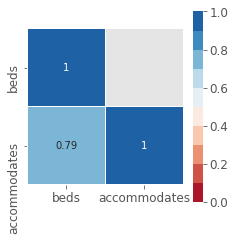

In [47]:
Correlation_Plot (Data[['beds','accommodates']], 3.5)

It also can be seen that these two parameters, **beds** and **accommodates** are highly correlated

In [57]:
Beds_Types_Count=pd.DataFrame(Data[Beds_List].sum(),columns=['count'])
Beds_Types_Count.T

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
count,193,98,446,290,23878


In [58]:
Rooms_Types_Count=pd.DataFrame(Data[Rooms_List].sum(),columns=['count'])
Rooms_Types_Count.T

,Entire home/apt,Private room,Shared room
count,13567,10516,822


In [59]:
Properties_Types_Count=pd.DataFrame(Data[Properties_List].sum(),columns=['count'])
Properties_Types_Count.T

,Apartment,Bed & Breakfast,Boat,Cabin,Camper/RV,Castle,Cave,Chalet,Dorm,Earth House,House,Hut,Lighthouse,Loft,Other,Tent,Treehouse,Villa
count,22513,170,11,3,1,1,1,1,48,1,1536,1,1,558,46,3,6,4


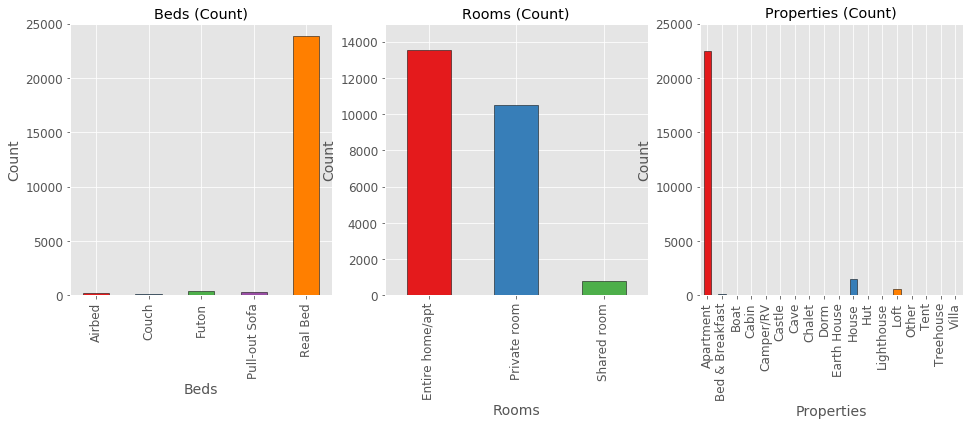

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharex=False)
#
_ = Beds_Types_Count.reset_index().plot.bar(x='index', y='count', rot=90, legend=False, ax=ax[0],
                                            color=sns.color_palette("Set1"), edgecolor="k")
_ = ax[0].set_title('Beds (Count)')
_ = ax[0].set_ylim([0, 25e3])
_ = ax[0].set_xlabel('Beds')
_ = ax[0].set_ylabel('Count')
#
_ = Rooms_Types_Count.reset_index().plot.bar(x='index', y='count', rot=90, legend=False, ax=ax[1],
                                            color=sns.color_palette("Set1"), edgecolor="k")
_ = ax[1].set_title('Rooms (Count)')
_ = ax[1].set_ylim([0, 15e3])
_ = ax[1].set_xlabel('Rooms')
_ = ax[1].set_ylabel('Count')
#
_ = Properties_Types_Count.reset_index().plot.bar(x='index', y='count', rot=90, legend=False, ax=ax[2],
                                            color=sns.color_palette("Set1"), edgecolor="k")
_ = ax[2].set_title('Properties (Count)')
_ = ax[2].set_ylim([0, 2.5e4])
_ = ax[2].set_xlabel('Properties')
_ = ax[2].set_ylabel('Count')

We can see that the majority of beds are real beds and apartments are the most popular ones amount properties. Moreover, most guests prefer to avoid shared rooms.

### Reviews

In [86]:
Columns_list=Data.columns
Review_list=list()
for i in range(len(Columns_list)):
    if Columns_list[i].find('review') != -1:
        Review_list.append(Columns_list[i])
Review=Data[Review_list]
Review.head().style.hide_index()

review_scores_rating,review_scores_accuracy,review_scores_value,review_scores_location,number_of_reviews,review_scores_checkin,review_scores_cleanliness,review_scores_communication
86,9,9,10,62,9,7,9
98,10,10,9,35,10,10,10
96,10,9,10,26,10,9,10
100,10,10,10,1,10,10,10
96,10,9,10,16,10,9,9


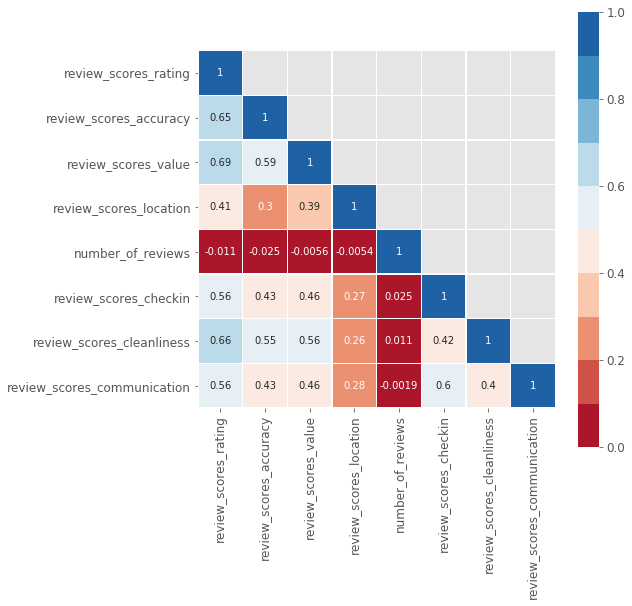

In [87]:
Correlation_Plot (Review, 8)

It seems that **number of reviews** and **review scores location** are insignifiancly correlated with the other rewivew paramters.

In [88]:
Review=Review.drop(columns=['number_of_reviews','review_scores_location'])

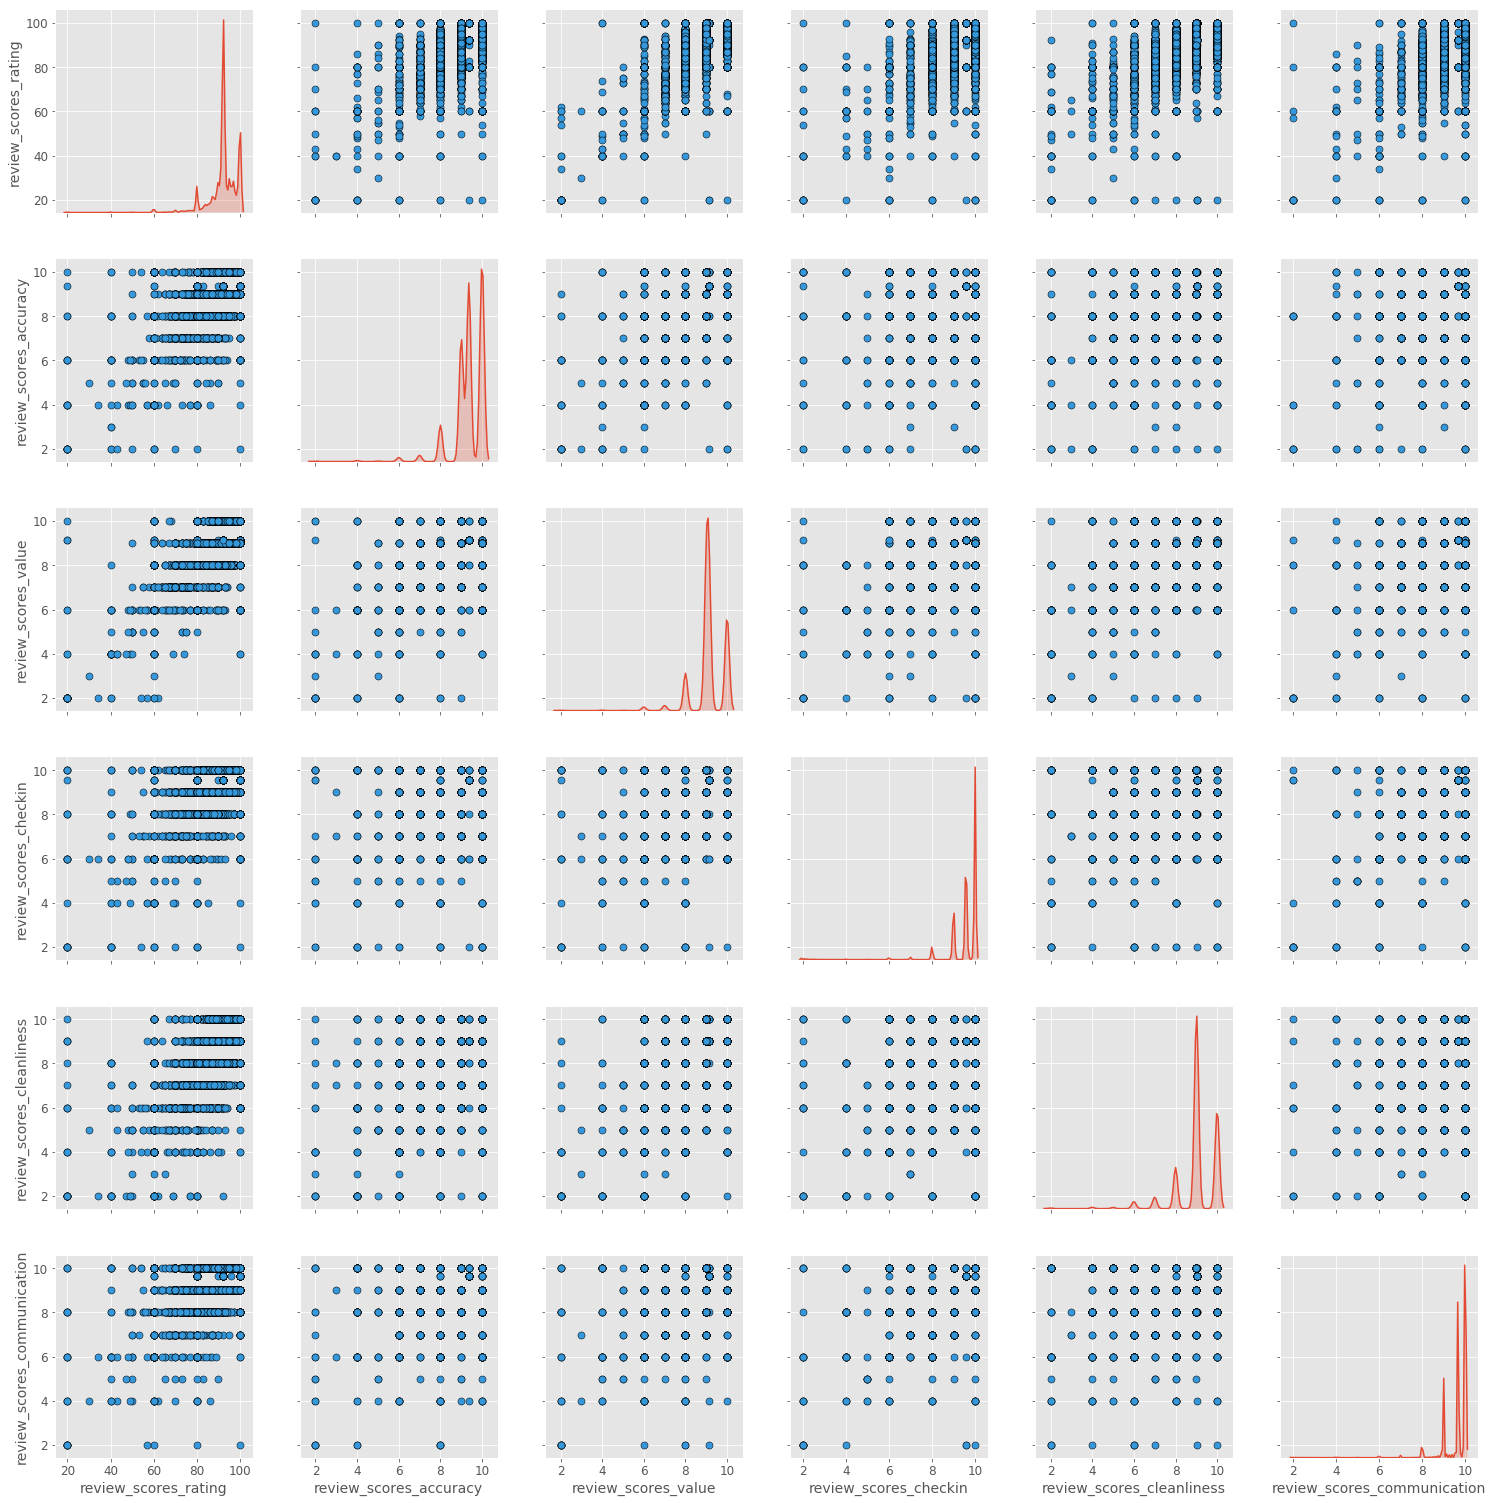

In [89]:
_ = sns.pairplot(Review, height=3.5,diag_kind="kde", plot_kws=dict(s=50, color="#3498db", edgecolor="k", linewidth=0.5),
             diag_kws=dict(shade=True))

### Price and Zipcodes

In [90]:
Columns_list=Data.columns
Price_list=list()
for i in range(len(Columns_list)):
    if Columns_list[i].find('price') != -1:
        Price_list.append(Columns_list[i])
Price=Data[Price_list]
pd.DataFrame(Price.mean(), columns=['mean'])

,mean
price,171.685364
monthly_price,3044.405497
weekly_price,950.968222


Consider the most popular place (using their zip code)

In [91]:
Zip_df = pd.DataFrame(Data.zipcode.value_counts())
Zip_df[Zip_df.zipcode>200].head(18).T

,11211,10002,10009,10003,11238,10011,10014,11216,10019,11206,10012,10025,11221,11222,11237,11215,10016,10036
zipcode,1164,1043,984,824,772,697,674,666,664,631,630,613,610,605,519,493,491,476


In [94]:
Zip_df

,index,zipcode
0,11211,1164
1,10002,1043
2,10009,984
3,10003,824
4,11238,772
...,...,...
174,11364,1
175,111006,1
176,1001,1
177,11357,1


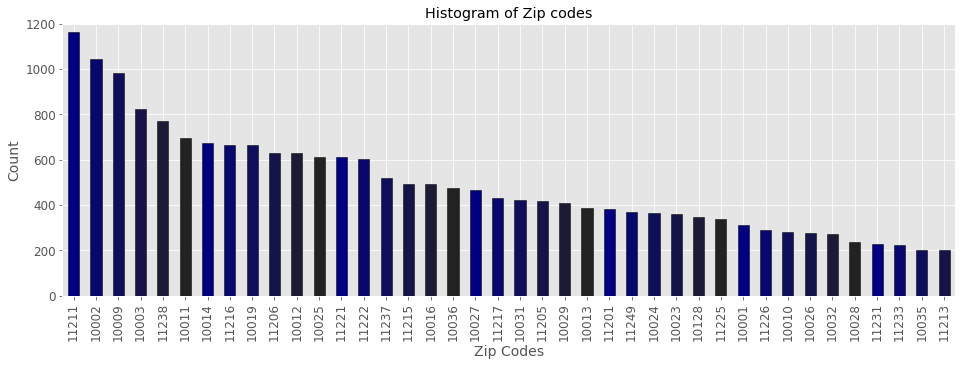

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Zip_df[Zip_df.zipcode>200].reset_index().plot.bar(x='index', y='zipcode', ax=ax, rot=90, legend=False,
                                                  color=sns.dark_palette("navy", reverse=True), edgecolor="k")
_ = ax.set_title('Histogram of Zip codes')
_ = ax.set_ylim([0, 12e2])
_ = ax.set_xlabel('Zip Codes')
_ = ax.set_ylabel('Count')

In [103]:
Zip_list=Zip_df[Zip_df.zipcode>200].index
Zip_df=Data[['zipcode','price']]
Price_Zipcode=Zip_df.groupby('zipcode')['price'].aggregate({'average_price': 'mean'}).round(0)

In [104]:
Price_Zipcode.head(18).T

zipcode,1001,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019
average_price,250.0,301.0,190.0,227.0,187.0,219.0,237.0,457.0,177.0,266.0,254.0,246.0,306.0,281.0,288.0,233.0,201.0,211.0


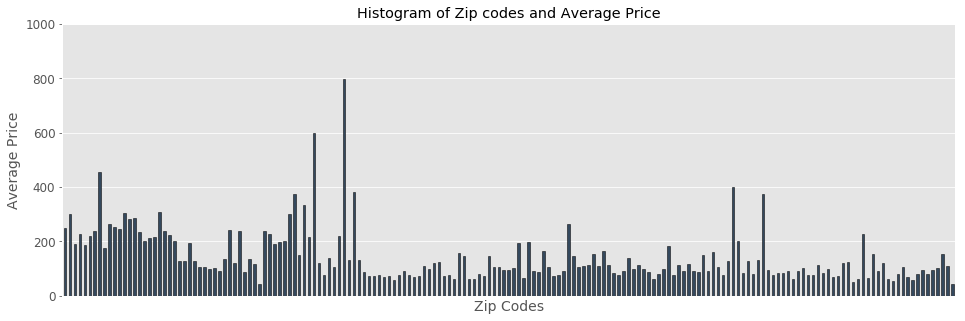

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Price_Zipcode.plot(kind='bar', ax=ax, legend=False, color='#34495e', edgecolor="k")
_ = ax.set_title('Histogram of Zip codes and Average Price')
_ = ax.set_xticks([])
_ = ax.set_ylim([0, 1e3])
_ = ax.set_xlabel('Zip Codes')
_ = ax.set_ylabel('Average Price')

### Price and Reviews

Creating a new dataframe with price and the average of ratings.

In [106]:
temp=list(Review.columns)
temp.insert(0,'price')
Price=Data[temp]
del temp
Price.review_scores_rating=np.round(Price.review_scores_rating/10)
Price['average_review']=0
Price['average_review']=np.round(Price[Review.columns.tolist()].mean(axis=1))
# Droping unessary columns
Price=Price.drop(columns=Review.columns.tolist()).sort_values('price', ascending=False)
Price.head(10).style.hide_index()

price,average_review
8000,9
6950,9
6500,9
6500,9
6000,9
6000,9
5250,9
5000,9
5000,9
5000,8


In [107]:
Price['average_review']=Price['average_review'].astype('int')
Review_Price=Price.groupby('average_review').mean().round(0)
Review_Price.sort_values('price', ascending=False).head()

,price
average_review,
9,183.0
10,162.0
2,149.0
8,140.0
4,139.0


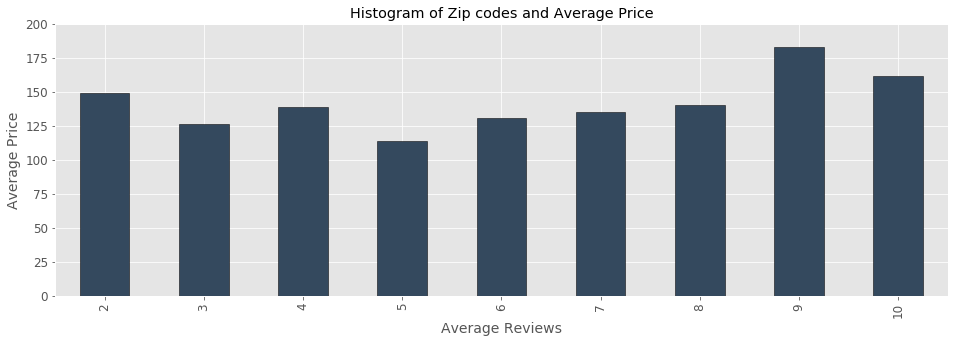

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Review_Price.plot(kind='bar', ax=ax, legend=False, color='#34495e', edgecolor="k")
_ = ax.set_title('Histogram of Zip codes and Average Price')
_ = ax.set_ylim([0, 2e2])
_ = ax.set_xlabel('Average Reviews')
_ = ax.set_ylabel('Average Price')